In [1]:
import pandas as pd
import datetime
from dateutil import tz
import folium

pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000

import stride

In [3]:
from bus_ha_sensor.bus_utils import *

In [7]:
# Example usage with current values
date_from = "2025-02-19"
date_to = "2025-02-19"

# Get routes for Reading direction 1
routes_df = get_routes_for_route_mkt(
    "23056", date_from, date_to, filter_name="רדינג", direction="1"
)

line_ref = routes_df["line_ref"].iloc[0]

# Get vehicle locations for the specified time range
start_time = datetime.datetime(2025, 2, 19, 9, tzinfo=tz.gettz("Israel"))
end_time = datetime.datetime(2025, 2, 19, 12, tzinfo=tz.gettz("Israel"))

siri_vehicle_locations_480 = get_vehicle_locations(line_ref, start_time, end_time)


# Filter for the newest siri_ride__id
newest_ride_id = siri_vehicle_locations_480["siri_ride__id"].iloc[0]  # sorted by desc
siri_vehicle_locations_480 = siri_vehicle_locations_480[
    siri_vehicle_locations_480["siri_ride__id"] == newest_ride_id
]


siri_vehicle_locations_480.shape

(78, 22)

In [11]:
!uv pip install matplotlib

Resolved 11 packages in 1.13s                                        
Prepared 5 packages in 683ms                                                 
Installed 5 packages in 12ms                                
 + contourpy==1.3.1
 + cycler==0.12.1
 + fonttools==4.56.0
 + kiwisolver==1.4.8
 + matplotlib==3.10.0


(78, 22)


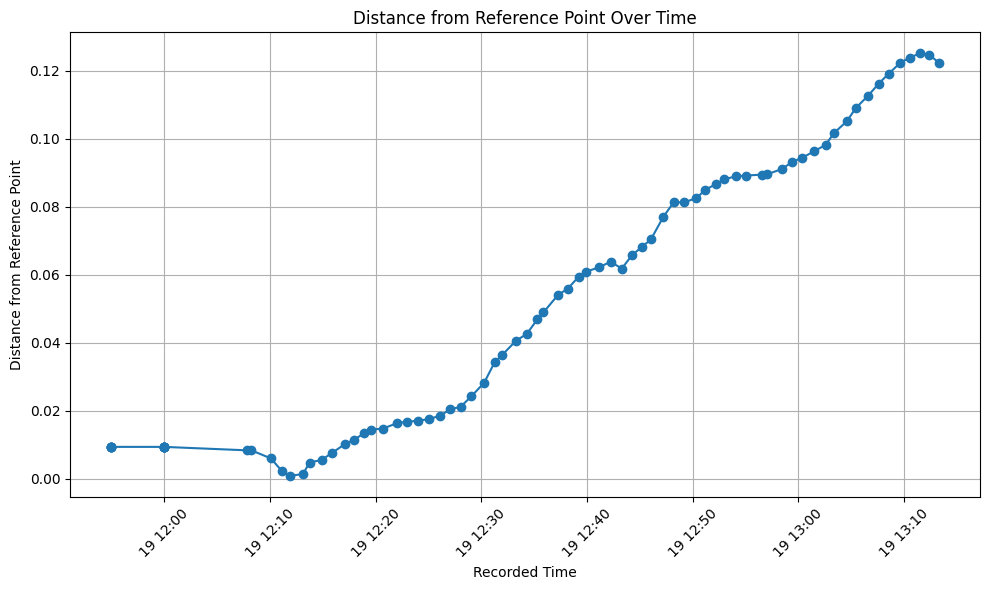

In [15]:
import matplotlib.pyplot as plt


print(siri_vehicle_locations_480.shape)
siri_vehicle_locations_480_small = siri_vehicle_locations_480
# Calculate distances from reference point
ref_point = (32.090260, 34.782621)

# Sort by recorded time to analyze sequence
sorted_locations = siri_vehicle_locations_480_small.sort_values("recorded_at_time")

# Calculate distance from reference point for each location
sorted_locations["distance_from_ref"] = (
    (sorted_locations["lat"] - ref_point[0]) ** 2
    + (sorted_locations["lon"] - ref_point[1]) ** 2
) ** 0.5


# Plot the distances over time
plt.figure(figsize=(10, 6))
plt.plot(
    sorted_locations["recorded_at_time"],
    sorted_locations["distance_from_ref"],
    marker="o",
)
# plt.plot(sorted_locations['recorded_at_time'], sorted_locations['distance_from_journey_start'], marker='o')
plt.title("Distance from Reference Point Over Time")
plt.xlabel("Recorded Time")
plt.ylabel("Distance from Reference Point")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()